Hola **Jairo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

El dataset proporcionado por la compañía es **telecom_dataset_us.csv** y contiene las siguientes columnas:

    • user_id: ID de la cuenta de cliente
    • date: fecha en la que se recuperaron las estadísticas
    • direction: "dirección" de llamada (out para saliente, in para entrante)
    • internal: si la llamada fue interna (entre los operadores de un cliente o clienta)
    • operator_id: identificador del operador
    • is_missed_call: si fue una llamada perdida
    • calls_count: número de llamadas
    • call_duration: duración de la llamada (sin incluir el tiempo de espera) es decir solo cuando empiezan hablar
    • total_call_duration: duración de la llamada (incluido el tiempo de espera) es decir desde que suena el telefono
        
El conjunto de datos **telecom_clients_us.csv** tiene caracteristicas de los Clientes con las siguientes columnas:

	• user_id: ID de usuario/a
    • tariff_plan: tarifa actual de la clientela
    • date_start: fecha de registro de la clientela


## Descomposición de tareas

En esta primera etapa del proyecto realizaremos la descomposición de las tareas para tener orden claro y poder cumplir las necesidades de nuestro cliente CallMeMaybe.

El presente proyecto estarà organizado de la siguiente manera:


1. Descomposición de tareas
2.  Pre-procesamiento de datos
3. Análisis exploratorio de datos - Metricas e Indicadores
4. Pruebas de hipótesis
5. Dashboards
6. Presentaciòn corporativa
7. Conclusiones y recomendaciones
8. Bibliografia

### Definir el Objetivo del proyecto

Determinar los operadores menos eficaces en CallMeMaybe a travès de la evaluación del rendimiento, teniendo en cuenta los siguientes criterios:

* Llamadas entrantes: Determinar operadores con altos índices de llamadas perdidas y tiempos de espera prolongados para atender llamadas(Demora en la contestación de las llamadas)
* Llamadas internas: Identificar operadores con llamadas internas perdidas.
* Llamadas salientes: Detectar la duracion de llamadas salientes de los operadores (bajo volumen= ineficiencia)

Este análisis proporcionará indicadores clave de rendimiento (KPI) basados en los datos históricos del dataset, apoyando la toma de decisiones para optimizar el servicio, mejorar la experiencia del cliente y garantizar una distribución equitativa de la carga laboral entre los operadores.

## Pre-procesamiento de datos 

En esta etapa se realizara todos los preparativos necesarios para comenzar el análisis de datos

* Importar librerías 
* Cargar los datos.
* Pre-visualizaciòn de los datos: Trabajar los valores ausentes, duplicados y tipos de datos erróneos.
* Limpiar los datos: Completar los datos: Crear una columnna con los tiempos de espera de las llamadas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class="tocSkip"></a>

Excelente trabajo con el avance de tu proyecto Jairo! Sin embargo, para esta primera etapa sólo debías enviar la parte de descomposición de tareas, sin embargo ya tienes listo el proyecto para la etapa de `Proyecto Final. Entrega del proyecto`, te dejaré algunos comentarios muy generales a modo de que puedas usarlos para mejorar el proyecto si así lo ves necesario:

- **Contexto y objetivos**: Incluye esta sección introductoria que ayude a entender el contexto del projecto, pero también sería bueno ser un poco más detallada en el problema que trabajarás, por que se realiza el proyecto, etc.

- **Preprocesamiento de datos**: Es una parte escencial en tu proyecto y lo tienes bastante bien cubierto, felicidades!

- **Análisis exploratorio**: En esta sección tienes muy bien cubierto los pasos para entender los datos con los que trabajas, te recomendaría incluir la revisión de datos atípicos que luego puedan llegar a causar alguna métrica errónea al final de tu proyecto.

- **Prueba de hipótesis**: Determinar si tenemos una diferencia significativa en nuestra métrica objetivo es importante por lo que hiciste muy bien al incluirla

- **Conclusiones y recomendaciones**: No olvides que esto debe ir al final de todos tus proyectos.
    
    
Saludos!
</div>

### Importar Librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import statsmodels.stats.multitest as smm
import math as mt
import datetime as dt
from scipy.stats import ttest_ind
from scipy import stats

#### Cargar los datos: Telecom

</div>
<div class="alert alert-block alert-info">
<b>Telecom</b><a class="tocSkip"></a>

In [2]:
telecom = pd.read_csv('/datasets/telecom_dataset_us.csv')

In [3]:
telecom

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


#### Pre-visualizaciòn de los datos : Telecom

Se realiza una funciòn para poder determinar la informaciòn del dataset e identificar si hay valores ausentes y duplicados

In [4]:
def analisis_exploratorio_df(data):
    print(data.shape)
    print()
    print(data.info())
    print()
    print(data.describe())
    print()
    print('valores ausentes:',)
    print(data.isna().sum())
    print()
    print('filas duplicadas:', data.duplicated().sum())

In [5]:
analisis_exploratorio_df(telecom)

(53902, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None

             user_id    operator_id   calls_count  call_duration  \
count   53902.000000   45730.000000  53902.000000   53902.000000   
mean   167295.344477  916535.993002     16.451245     866.684427   
std       598.883775   21254.123136     62.917170

**Importante:** Con la Pre-visualizaciòn del dataset se puede identificar que:

    * Hay valores ausentes en las columnas: internal y operator_id : Los cuales seràn eliminados ya que cada operador debe tener su propio resultado y no es posible rellenarlo con los mètodos de mean y median
    
    * El tipo de datos de la columna: operator_id: identificador del operador es float64, lo que puede traer problemas más adelante, por lo tanto lo transformarè a int.

In [6]:
# Modificar el tipo object a date en la columna: Date

telecom['date'] = pd.to_datetime(telecom['date'], format='%Y-%m-%d %H:%M:%S')

#### Limpiar los datos: Telecom

**Valores Ausentes**

In [7]:
# Transformar el tipo float64 a int de la columna: 'operator_id'

telecom = telecom.dropna()
telecom['operator_id'] = telecom['operator_id'].astype('int')

/tmp/ipykernel_32/476203250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom['operator_id'] = telecom['operator_id'].astype('int')


In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45670 non-null  int64                                
 1   date                 45670 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45670 non-null  object                               
 3   internal             45670 non-null  object                               
 4   operator_id          45670 non-null  int64                                
 5   is_missed_call       45670 non-null  bool                                 
 6   calls_count          45670 non-null  int64                                
 7   call_duration        45670 non-null  int64                                
 8   total_call_duration  45670 non-null  int64                                
dtypes: bool

**Valores Duplicados**

Se analizara los valores duplicados para poder tener un anàlisis adecuado de los datos

In [9]:
print('duplicados encontrados:' ,telecom.duplicated().sum())
duplicated = telecom[telecom.duplicated()]
print('El porcentaje de duplicados respecto del total es de:', format((len(duplicated) / len(telecom)), '.1%'))
duplicated.head()

duplicados encontrados: 4179
El porcentaje de duplicados respecto del total es de: 9.2%


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50
44,166377,2019-08-14 00:00:00+03:00,out,False,880026,False,10,1567,1654
51,166377,2019-08-15 00:00:00+03:00,out,False,880026,False,11,1413,1473
62,166377,2019-08-19 00:00:00+03:00,out,False,880026,False,14,1519,1598
78,166377,2019-08-22 00:00:00+03:00,out,False,880026,True,6,0,55


In [10]:
# Se eliminan los valores duplicados para que no interfiera en el análisis de datos

telecom= telecom.drop_duplicates().reset_index(drop=True)

In [11]:
telecom.duplicated().sum()

0

#### Completar datos: Telecom:  Creación de columna : Tiempo de espera

In [12]:
telecom['wait_time'] = telecom['total_call_duration'] - telecom['call_duration']
telecom.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
0,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
1,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
3,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25
4,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26


### Cargar los datos:Clientes

</div>
<div class="alert alert-block alert-warning">
<b>Clients</b> <a class="tocSkip"></a>

In [13]:
clients = pd.read_csv('/datasets/telecom_clients_us.csv', sep=',')

In [14]:
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


#### Pre-visualizaciòn de los datos : Clients

In [15]:
analisis_exploratorio_df(clients)

(732, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None

             user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000

valores ausentes:
user_id        0
tariff_plan    0
date_start     0
dtype: int64

filas duplicadas: 0


**Importante** En la Pre-visualización de los datos se puede observar que hay 732 filas en 3 columnas, de las cuales no se encontraron valores ausentes ni duplicados. Sin embargo es necesario modificar de la columna: date_start que es de tipo: object, se debe transformar a date

#### Limpiar los datos: Clients

In [16]:
# Modificar el tipo object a date en la columna: Date

clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d %H:%M:%S') 

In [17]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


## Análisis exploratorio de datos  (EDA)- Metricas e Indicadores

**Fecha minima y maxima de los datos**

In [18]:
print(telecom['date'].min())
print(telecom['date'].max())

2019-08-02 00:00:00+03:00
2019-11-28 00:00:00+03:00


Los datos que se están analizando son de 3 meses, (desde agosto del 2019 hasta noviembre 2019)

# **LLamadas Entrantes**

#### Cantidad total de llamadas 

In [19]:
# Filtrar solo las llamadas entrantes ('in')
incoming_calls = telecom[telecom['direction'] == 'in']
incoming_calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
21,166377,2019-08-12 00:00:00+03:00,in,False,880028,False,1,407,411,4
26,166377,2019-08-13 00:00:00+03:00,in,False,880028,False,1,88,102,14
29,166377,2019-08-14 00:00:00+03:00,in,False,880026,False,2,197,218,21
30,166377,2019-08-14 00:00:00+03:00,in,False,880028,False,1,33,37,4
38,166377,2019-08-15 00:00:00+03:00,in,False,880028,False,1,23,27,4
...,...,...,...,...,...,...,...,...,...,...
41468,168601,2019-11-25 00:00:00+03:00,in,False,952914,False,7,1229,1282,53
41471,168601,2019-11-26 00:00:00+03:00,in,False,952914,False,4,539,562,23
41472,168601,2019-11-27 00:00:00+03:00,in,False,952914,False,2,53,77,24
41483,168606,2019-11-08 00:00:00+03:00,in,False,957922,True,1,0,7,7


In [20]:
# Calcular la cantidad total de llamadas entrantes

total_incoming_calls = incoming_calls['calls_count'].sum()

print(f"Cantidad total de llamadas entrantes: {total_incoming_calls}")

Cantidad total de llamadas entrantes: 93742


####  Top 10 Operadores que Reciben Más Llamadas Entrantes

Top 10 operadores con más llamadas entrantes:
     operator_id  calls_count
288       913938         4766
674       952948         3540
289       913942         2467
76        893804         2433
358       921318         2319
570       940588         2127
445       931458         2076
577       940630         1985
154       901880         1823
361       921818         1807


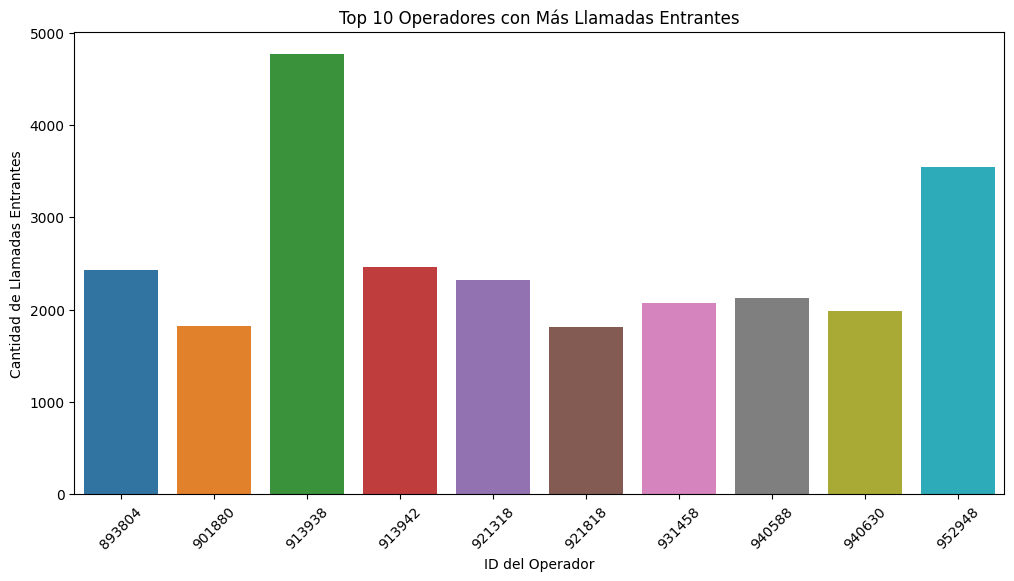

In [21]:
# Agrupar por operador y sumar las llamadas entrantes
top_operators_by_calls = incoming_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Ordenar por cantidad de llamadas y seleccionar el top 10
top_10_operators_calls = top_operators_by_calls.sort_values(by='calls_count', ascending=False).head(10)

print("Top 10 operadores con más llamadas entrantes:")
print(top_10_operators_calls)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='operator_id', y='calls_count', data=top_10_operators_calls)
plt.title('Top 10 Operadores con Más Llamadas Entrantes')
plt.xlabel('ID del Operador')
plt.ylabel('Cantidad de Llamadas Entrantes')
plt.xticks(rotation=45)
plt.show()

Los operadores que reciben la mayor cantidad de llamadas se encuentran desde 4.766 , 3.540 y 2.467 llamadas

###   Cantidad de Llamadas Perdidas

In [22]:
# Calcular la cantidad total de llamadas perdidas
total_missed_calls = incoming_calls['is_missed_call'].sum()

print(f"Cantidad total de llamadas perdidas: {total_missed_calls}")

Cantidad total de llamadas perdidas: 684


 #### Top 10 Operadores con Mayor Cantidad de Llamadas Perdidas

Top 10 operadores con más llamadas perdidas:
     operator_id  is_missed_call
289       913942              28
22        885890              21
21        885876              17
594       944216              16
570       940588              15
598       944226              14
288       913938              13
596       944220              12
577       940630              11
597       944222              11


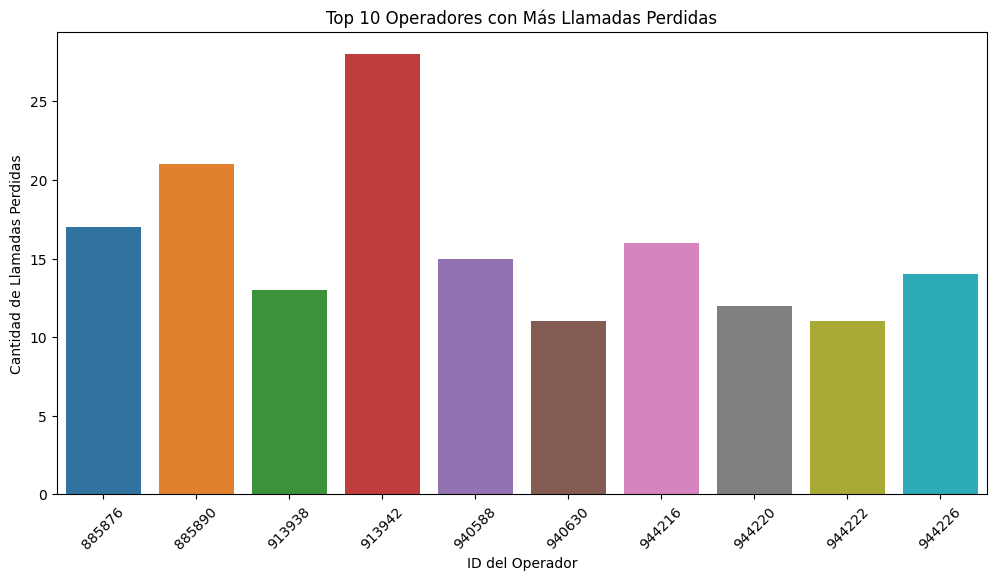

In [23]:
# Agrupar por operador y sumar las llamadas perdidas
top_operators_by_missed_calls = incoming_calls.groupby('operator_id')['is_missed_call'].sum().reset_index()

# Ordenar por cantidad de llamadas perdidas y seleccionar el top 10
top_10_operators_missed = top_operators_by_missed_calls.sort_values(by='is_missed_call', ascending=False).head(10)

print("Top 10 operadores con más llamadas perdidas:")
print(top_10_operators_missed)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='operator_id', y='is_missed_call', data=top_10_operators_missed)
plt.title('Top 10 Operadores con Más Llamadas Perdidas')
plt.xlabel('ID del Operador')
plt.ylabel('Cantidad de Llamadas Perdidas')
plt.xticks(rotation=45)
plt.show()

In [24]:
top_operators_by_missed_calls.sum()

operator_id       696473118
is_missed_call          684
dtype: int64

La grafica anterior, quiere decir que el operador más ineficiente en terminos de llamadas perdidas es 913942, seguido de 885890 y el 885876. Estos Operadores deben ser analizamos mas en detalle para conocer las causas de su ineficiencia.

###   Tiempo promedio de llamada

#### Tiempo Mayor de Espera de las Llamadas Entrantes

In [25]:
# Calcular el tiempo mayor de espera
max_waiting_time = incoming_calls['wait_time'].max()

In [26]:
# Filtrar la fila con el tiempo mayor de espera
max_waiting_call = incoming_calls[incoming_calls['wait_time'] == max_waiting_time]

print(f"El tiempo mayor de espera para las llamadas entrantes es: {max_waiting_time} segundos")
print("Detalles de la llamada con mayor tiempo de espera:")
max_waiting_call

El tiempo mayor de espera para las llamadas entrantes es: 3998 segundos
Detalles de la llamada con mayor tiempo de espera:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
29451,167650,2019-11-11 00:00:00+03:00,in,False,931458,False,133,12379,16377,3998


#### Determinar el Tiempo Mayor de Espera por Operador

In [27]:
# Agrupar por operador y calcular el tiempo máximo de espera
max_waiting_time_by_operator = incoming_calls.groupby('operator_id')['wait_time'].max().reset_index()

# Renombrar columna para claridad
max_waiting_time_by_operator.rename(columns={'wait_time': 'max_waiting_time'}, inplace=True)

# Ordenar por tiempo máximo de espera
max_waiting_time_by_operator = max_waiting_time_by_operator.sort_values(by='max_waiting_time', ascending=False)


#### Top 10 Operadores con Tiempos de Espera Más Largos

Top 10 operadores con tiempos de espera más largos:
     operator_id  max_waiting_time
445       931458              3998
206       906070              3725
335       919790              2217
337       919794              2112
358       921318              2042
328       919204              1745
288       913938              1558
74        893402              1424
333       919552              1399
289       913942              1375


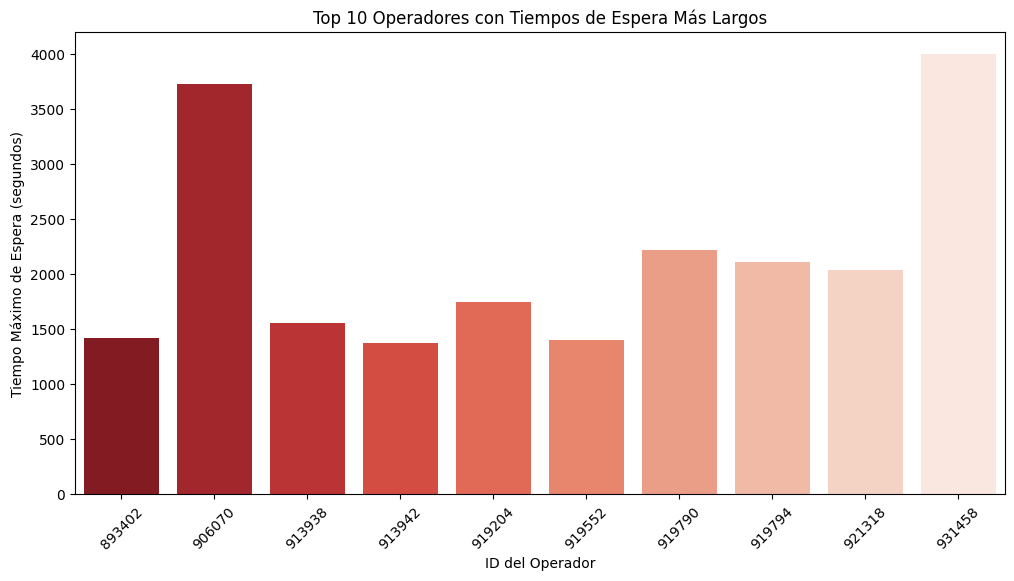

In [28]:
# Seleccionar el top 10 operadores con mayor tiempo de espera
top_10_waiting_operators = max_waiting_time_by_operator.head(10)

print("Top 10 operadores con tiempos de espera más largos:")
print(top_10_waiting_operators)

# Visualización del top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='operator_id', y='max_waiting_time', data=top_10_waiting_operators, palette='Reds_r')
plt.title('Top 10 Operadores con Tiempos de Espera Más Largos')
plt.xlabel('ID del Operador')
plt.ylabel('Tiempo Máximo de Espera (segundos)')
plt.xticks(rotation=45)
plt.show()

El tiempo más largo que alguien esperó antes de ser atendido es de 3.998 segundos, lo que equivale alrededor de 1 hora. El operador ineficiente es el 931458. A los 10 operadores que se muestran en la grafica requieren de atención prioritaria ya que esto influye en la experiencia de los clientes.

# **LLamadas Internas**

### ¿Cuántas llamadas internas se realizaron?

In [29]:
# Filtrar llamadas internas
internal_calls = telecom[telecom['internal'] == True]

# Calcular el total de llamadas internas
total_internal_calls = internal_calls['calls_count'].sum()

print(f"Cantidad total de llamadas internas realizadas: {total_internal_calls}")

Cantidad total de llamadas internas realizadas: 13665


#### Llamadas internas por operador

In [30]:
# Agrupar por operador y calcular el total de llamadas internas realizadas
internal_calls_by_operator = internal_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Renombrar columna para mayor claridad
internal_calls_by_operator.rename(columns={'calls_count': 'total_internal_calls'}, inplace=True)

# Ordenar por cantidad de llamadas internas
internal_calls_by_operator = internal_calls_by_operator.sort_values(by='total_internal_calls', ascending=False)

print("Llamadas internas realizadas por cada operador:")
print(internal_calls_by_operator.head(10))

Llamadas internas realizadas por cada operador:
     operator_id  total_internal_calls
171       907986                   447
143       906394                   416
136       905574                   345
144       906396                   316
134       905566                   310
149       906406                   298
21        887276                   282
152       906412                   255
146       906400                   244
207       915358                   242


#### Determinar las llamadas perdidas por operadores

In [31]:
# Filtrar llamadas internas perdidas
missed_internal_calls = internal_calls[internal_calls['is_missed_call'] == True]

In [32]:
# Calcular el total de llamadas internas perdidas

total_missed_internal_calls = missed_internal_calls['is_missed_call'].sum()

print(f"Cantidad total de llamadas internas perdidas: {total_missed_internal_calls}")

Cantidad total de llamadas internas perdidas: 2412


In [33]:
# Agrupar por operador y calcular el total de llamadas internas perdidas
missed_internal_calls_by_operator = missed_internal_calls.groupby('operator_id')['is_missed_call'].sum().reset_index()

# Renombrar columna para mayor claridad
missed_internal_calls_by_operator.rename(columns={'is_missed_call': 'total_missed_internal_calls'}, inplace=True)

# Ordenar por cantidad de llamadas perdidas
missed_internal_calls_by_operator = missed_internal_calls_by_operator.sort_values(by='total_missed_internal_calls', ascending=False)


#### Top 10 operadores con mayor cantidad de llamadas internas perdidas

Top 10 operadores con mayor cantidad de llamadas internas perdidas:
     operator_id  total_missed_internal_calls
40        891414                           42
39        891410                           42
121       905564                           39
122       905566                           36
137       906406                           35
119       905538                           34
169       912722                           32
131       906394                           32
19        887276                           31
159       907986                           31


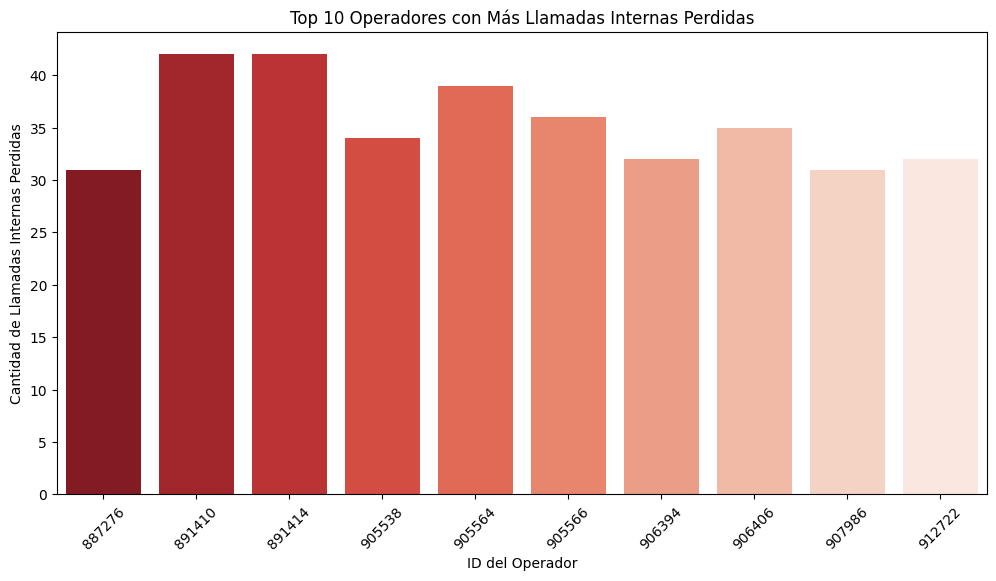

In [34]:
# Seleccionar el top 10 operadores con más llamadas internas perdidas
top_10_missed_internal_calls = missed_internal_calls_by_operator.head(10)

print("Top 10 operadores con mayor cantidad de llamadas internas perdidas:")
print(top_10_missed_internal_calls)

# Visualización del top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='operator_id', y='total_missed_internal_calls', data=top_10_missed_internal_calls, palette='Reds_r')
plt.title('Top 10 Operadores con Más Llamadas Internas Perdidas')
plt.xlabel('ID del Operador')
plt.ylabel('Cantidad de Llamadas Internas Perdidas')
plt.xticks(rotation=45)
plt.show()

La grafica anterior significa que de  13665 llamadas internas que se realizaron, se perdieron 2.412 llamadas. El operador mas ineficiente en este rubro es el 891414, con 42 llamadas perdidas. Puede ser que el operador es nuevo, o no esta bien capacitado con los sistemas de la compañia.

# **Llamadas salientes**

###  Cantidad Total de Llamadas Salientes

In [35]:
# Filtrar las llamadas salientes  (direction == "out") y calculamos el total
outgoing_calls = telecom[telecom['direction'] == "out"]

# Calcular la cantidad total de llamadas salientes
total_outgoing_calls = outgoing_calls['calls_count'].sum()

print(f"Cantidad total de llamadas salientes: {total_outgoing_calls}")

Cantidad total de llamadas salientes: 608343


###  Cantidad de Operadores que Realizan Llamadas Salientes

In [36]:
# Obtener la cantidad de operadores únicos que realizan llamadas salientes
total_outgoing_operators = outgoing_calls['operator_id'].nunique()

print(f"Cantidad de operadores que realizan llamadas salientes: {total_outgoing_operators}")

Cantidad de operadores que realizan llamadas salientes: 882


### Top 10 de los Operadores que Realizan Más Llamadas Salientes

Top 10 operadores que realizan más llamadas salientes:
     operator_id  calls_count
25        885890        58977
24        885876        58437
466       929428        23754
446       925922        19603
255       908640        14239
465       929426        11189
1         879898         7209
687       945286         6880
693       945302         6138
359       919364         4820


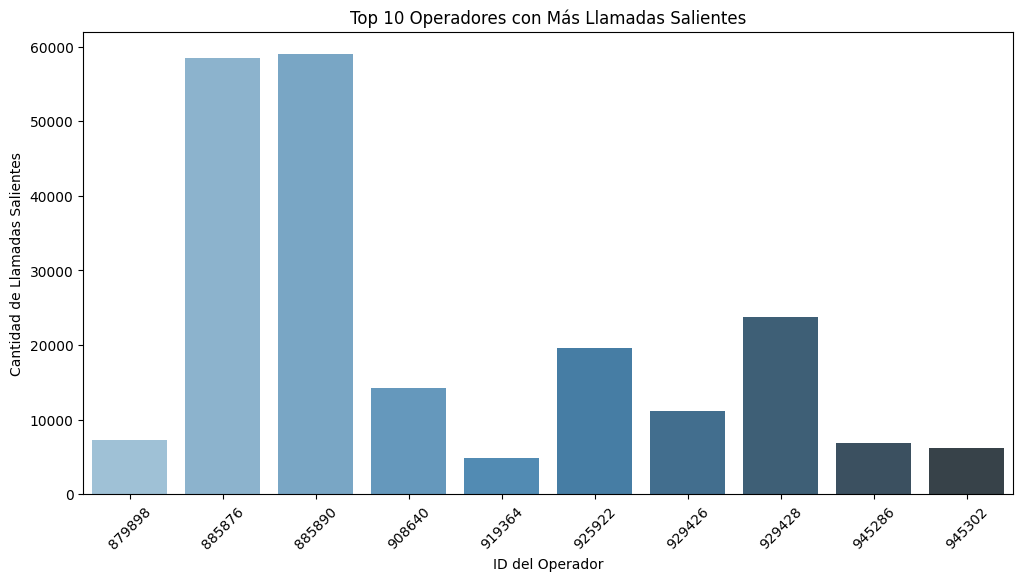

In [37]:
# Agrupar por operador y calcular el total de llamadas salientes realizadas
outgoing_calls_by_operator = outgoing_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Ordenar por cantidad de llamadas salientes y seleccionar el top 10
top_10_outgoing_operators = outgoing_calls_by_operator.sort_values(by='calls_count', ascending=False).head(10)

print("Top 10 operadores que realizan más llamadas salientes:")
print(top_10_outgoing_operators)

# Visualización del top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='operator_id', y='calls_count', data=top_10_outgoing_operators, palette='Blues_d')
plt.title('Top 10 Operadores con Más Llamadas Salientes')
plt.xlabel('ID del Operador')
plt.ylabel('Cantidad de Llamadas Salientes')
plt.xticks(rotation=45)
plt.show()

De acuerdo a la grafica anterior, hay 882 operadores que realizan llamadas salientes, el operador que realiza mas llamadas es el 885890 y 885876. Es importante resaltar que el operador 885890 es el que tiene mayor cantidad de llamadas perdidas. por lo cual se infiere que este Operador esta enfocado solamente en realizar llamadas y no en contestarlas.

###  Determinar el Umbral para: Bajo Número de Llamadas Salientes

Para identificar operadores Ineficientes con un bajo número de llamadas salientes realizadas, podemos establecer un criterio, como operadores cuya cantidad total de llamadas salientes esté por debajo de un umbral (el percentil 25 de las llamadas realizadas por todos los operadores) 

In [38]:
# Calcular el percentil 25 de las llamadas salientes realizadas por operadores

low_call_threshold = outgoing_calls_by_operator['calls_count'].quantile(0.25)

print(f"Umbral para bajo número de llamadas salientes (percentil 25): {low_call_threshold}")

Umbral para bajo número de llamadas salientes (percentil 25): 11.0


In [39]:
# Filtrar operadores con llamadas salientes por debajo del umbral

low_outgoing_operators = outgoing_calls_by_operator[outgoing_calls_by_operator['calls_count'] < low_call_threshold]

print(f"Operadores con bajo número de llamadas salientes: {low_outgoing_operators.count()}") 

low_outgoing_operators

Operadores con bajo número de llamadas salientes: operator_id    214
calls_count    214
dtype: int64


,operator_id,calls_count
8,882478,1
13,883018,2
14,883898,1
17,884402,4
18,884406,3
...,...,...
874,970258,1
875,970484,7
876,970486,6
877,972408,6


Segun la tabla y el analisis del umbral con los menores número de llamadas salientes, se puede observar que de los 882 operadores que realizan llamadas salientes, 214 tienen bajos indices de llamadas salientes con el percentil 25. Es decir operadores ineficientes que realizan menos de 11 llamadas 

### Análisis mensual y semanal

Primero, extraemos el mes y el día de la semana de la columna date del dataset: telecom

In [40]:
# Asegurarse de que la columna 'date' sea de tipo datetime
telecom['date'] = pd.to_datetime(telecom['date'])

# Crear columnas de mes y día de la semana
telecom['month'] = telecom['date'].dt.month
telecom['weekday'] = telecom['date'].dt.day_name()
telecom

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,month,weekday
0,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5,8,Monday
1,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1,8,Monday
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8,8,Monday
3,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25,8,Monday
4,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26,8,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
41486,168606,2019-11-09 00:00:00+03:00,out,False,957922,False,4,551,593,42,11,Saturday
41487,168606,2019-11-10 00:00:00+03:00,out,True,957922,False,1,0,25,25,11,Sunday
41488,168606,2019-11-10 00:00:00+03:00,out,True,957922,True,1,0,38,38,11,Sunday
41489,168606,2019-11-11 00:00:00+03:00,out,True,957922,False,2,479,501,22,11,Monday


#### Mes y Día con Más Llamadas Perdidas

Filtramos las llamadas perdidas (is_missed_call == True) y agrupamos por mes y día.



In [41]:
# Filtrar llamadas perdidas
missed_calls = telecom[telecom['is_missed_call'] == True]

In [42]:
missed_calls_by_month = missed_calls.groupby('month')['is_missed_call'].sum().reset_index()

# Agrupar por mes y calcular la cantidad total de llamadas
total_calls_by_month = telecom.groupby('month')['calls_count'].sum().reset_index()

# Combinar ambas tablas
calls_summary = pd.merge(missed_calls_by_month, total_calls_by_month, on='month')

# Renombrar columnas para mayor claridad
calls_summary.rename(columns={'is_missed_call': 'missed_calls', 'calls_count': 'total_calls'}, inplace=True)

calls_summary

,month,missed_calls,total_calls
0,8,568,34657
1,9,2464,133792
2,10,4913,271072
3,11,6164,262564


In [43]:

# Agrupar por mes y calcular la cantidad de llamadas perdidas
missed_calls_by_month = missed_calls.groupby('month')['is_missed_call'].sum().reset_index()
missed_calls_by_month

,month,is_missed_call
0,8,568
1,9,2464
2,10,4913
3,11,6164


In [44]:
# Agrupar por dia de la semana y calcular la cantidad de llamadas perdidas
missed_calls_by_weekday = missed_calls.groupby('weekday')['is_missed_call'].sum().reset_index()
missed_calls_by_weekday

,weekday,is_missed_call
0,Friday,2430
1,Monday,2392
2,Saturday,736
3,Sunday,526
4,Thursday,2742
5,Tuesday,2630
6,Wednesday,2653


In [45]:
# Encontrar el mes y día con más llamadas perdidas
most_missed_month = missed_calls_by_month.loc[missed_calls_by_month['is_missed_call'].idxmax()]
most_missed_weekday = missed_calls_by_weekday.loc[missed_calls_by_weekday['is_missed_call'].idxmax()]

print(f"Mes con más llamadas perdidas: {most_missed_month['month']} ({most_missed_month['is_missed_call']} llamadas perdidas)")
print(f"Día de la semana con más llamadas perdidas: {most_missed_weekday['weekday']} ({most_missed_weekday['is_missed_call']} llamadas perdidas)")

Mes con más llamadas perdidas: 11 (6164 llamadas perdidas)
Día de la semana con más llamadas perdidas: Thursday (2742 llamadas perdidas)


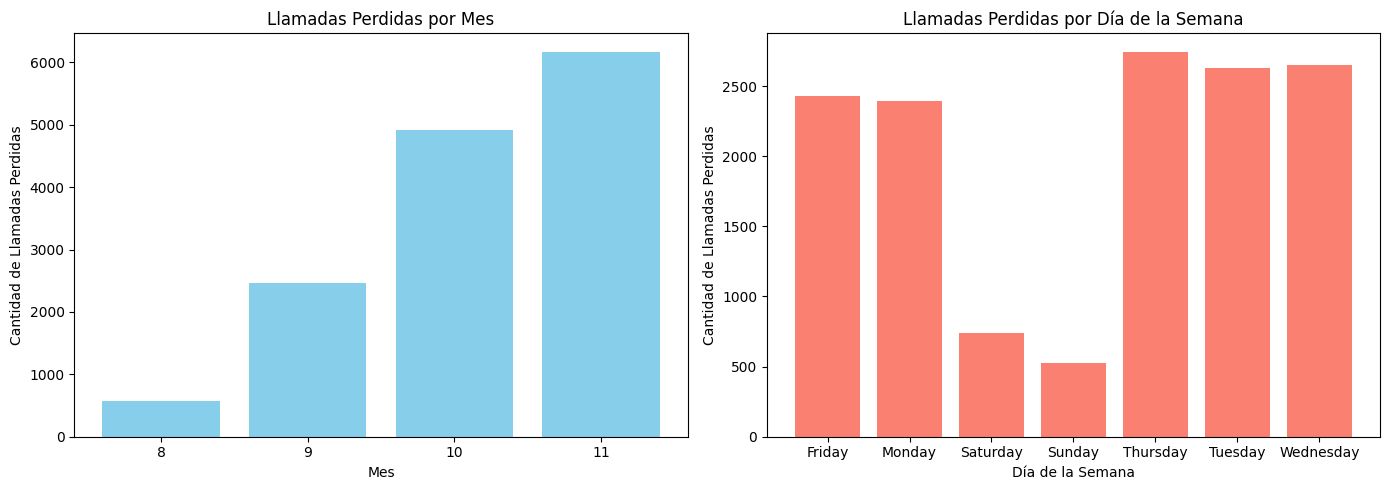

In [46]:
# Convertir 'month' a entero
missed_calls_by_month['month'] = missed_calls_by_month['month'].astype(int)

# Crear las gráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Llamadas perdidas por mes
axes[0].bar(missed_calls_by_month['month'], missed_calls_by_month['is_missed_call'], color='skyblue')
axes[0].set_title('Llamadas Perdidas por Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad de Llamadas Perdidas')
axes[0].set_xticks(missed_calls_by_month['month'])  # Asegura que las etiquetas sean enteros

# Gráfica 2: Llamadas perdidas por día de la semana
axes[1].bar(missed_calls_by_weekday['weekday'], missed_calls_by_weekday['is_missed_call'], color='salmon')
axes[1].set_title('Llamadas Perdidas por Día de la Semana')
axes[1].set_xlabel('Día de la Semana')
axes[1].set_ylabel('Cantidad de Llamadas Perdidas')

# Ajustar el diseño
plt.tight_layout()
plt.show()

En las tablas  y en la grafica se puede observar que si bien Noviembre es el mes con mayor numero de llamadas perdidas, se identifica que cada mes que va ir pasando las llamadas se increntan progresivamente. Esto es un factor critico que se debe tener en cuenta. Por otro lado el dia de la semana con mayor numero de llamadas perdidas es el Jueves y el fin de semana son los dias con menos llamadas perdidas, esto es debido a la naturaleza de la empresa.

#### Mes y Día con Más Tiempos de espera

In [47]:
# Filtrar llamadas entrantes
incoming_calls = telecom[telecom['direction'] == "in"]

# Agrupar por mes y día, y calcular el tiempo promedio de espera
wait_time_by_month = incoming_calls.groupby('month')['wait_time'].mean().reset_index().astype(int)
wait_time_by_month

,month,wait_time
0,8,53
1,9,72
2,10,106
3,11,101


In [48]:
wait_time_by_weekday = incoming_calls.groupby('weekday')['wait_time'].mean().reset_index()
wait_time_by_weekday 

,weekday,wait_time
0,Friday,88.700428
1,Monday,103.270115
2,Saturday,108.166871
3,Sunday,101.254072
4,Thursday,95.329703
5,Tuesday,98.341453
6,Wednesday,95.296868


In [49]:
# Encontrar el mes y día con mayores tiempos de espera
longest_wait_month = wait_time_by_month.loc[wait_time_by_month['wait_time'].idxmax()]
longest_wait_weekday = wait_time_by_weekday.loc[wait_time_by_weekday['wait_time'].idxmax()]

print(f"Mes con mayor tiempo de espera: {longest_wait_month['month']} ({longest_wait_month['wait_time']:.2f} segundos)")
print(f"Día de la semana con mayor tiempo de espera: {longest_wait_weekday['weekday']} ({longest_wait_weekday['wait_time']:.2f} segundos)")

Mes con mayor tiempo de espera: 10 (106.00 segundos)
Día de la semana con mayor tiempo de espera: Saturday (108.17 segundos)


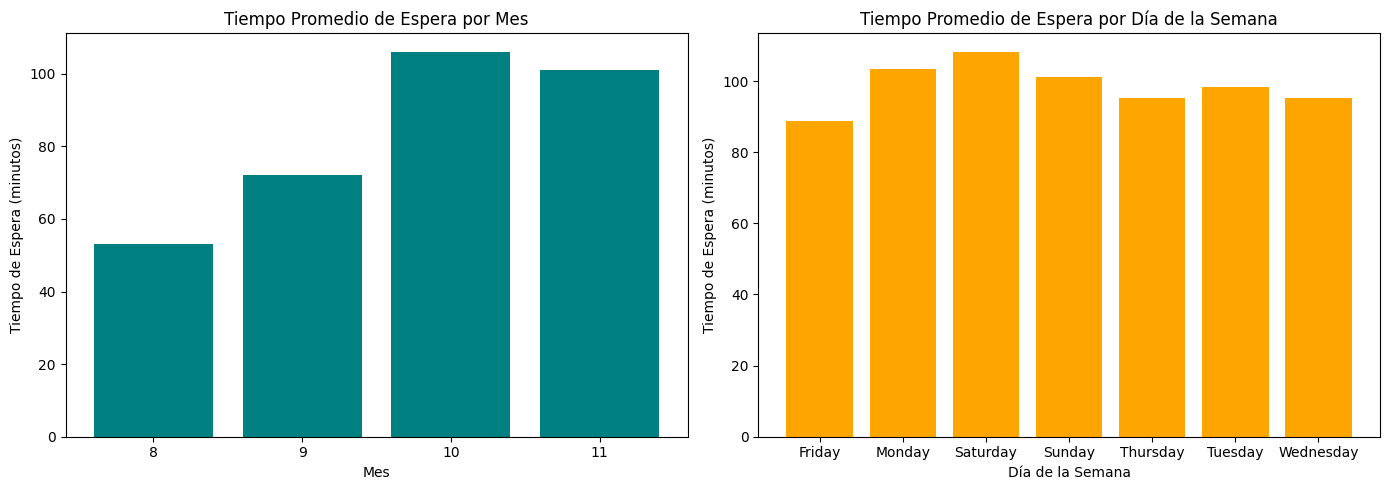

In [50]:
# Crear las gráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Promedio de espera por mes
axes[0].bar(wait_time_by_month['month'], wait_time_by_month['wait_time'], color='teal')  # Color cambiado a 'teal'
axes[0].set_title('Tiempo Promedio de Espera por Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Tiempo de Espera (minutos)')
axes[0].set_xticks(wait_time_by_month['month'])

# Gráfica 2: Promedio de espera por día de la semana
axes[1].bar(wait_time_by_weekday['weekday'], wait_time_by_weekday['wait_time'], color='orange')  # Color cambiado a 'orange'
axes[1].set_title('Tiempo Promedio de Espera por Día de la Semana')
axes[1].set_xlabel('Día de la Semana')
axes[1].set_ylabel('Tiempo de Espera (minutos)')

# Ajustar diseño
plt.tight_layout()
plt.show()

Se puede identificar que el mes con mayores tiempos de espera es Octubre debido a la gran cantidad de llamadas que se recibio este mes. Esto es importante detectarlo ya que para el proximo año se puede destinar mayor recurso de operadores para poder cubrir la demanda de llamadas.

#### Mes y Día con Mayor Número de Llamadas Salientes

In [51]:
# Filtrar llamadas salientes
outgoing_calls = telecom[telecom['direction'] == "out"]

# Agrupar por mes y día, y calcular el número total de llamadas
outgoing_calls_by_month = outgoing_calls.groupby('month')['calls_count'].sum().reset_index()
outgoing_calls_by_month

,month,calls_count
0,8,32976
1,9,122912
2,10,237814
3,11,214641


In [52]:
outgoing_calls_by_weekday = outgoing_calls.groupby('weekday')['calls_count'].sum().reset_index()
outgoing_calls_by_weekday

,weekday,calls_count
0,Friday,101692
1,Monday,105205
2,Saturday,37530
3,Sunday,27365
4,Thursday,113388
5,Tuesday,113680
6,Wednesday,109483


In [53]:
# Encontrar el mes y día con mayor número de llamadas salientes
most_outgoing_month = outgoing_calls_by_month.loc[outgoing_calls_by_month['calls_count'].idxmax()]
most_outgoing_weekday = outgoing_calls_by_weekday.loc[outgoing_calls_by_weekday['calls_count'].idxmax()]

print(f"Mes con mayor número de llamadas salientes: {most_outgoing_month['month']} ({most_outgoing_month['calls_count']} llamadas)")
print(f"Día de la semana con mayor número de llamadas salientes: {most_outgoing_weekday['weekday']} ({most_outgoing_weekday['calls_count']} llamadas)")

Mes con mayor número de llamadas salientes: 10 (237814 llamadas)
Día de la semana con mayor número de llamadas salientes: Tuesday (113680 llamadas)


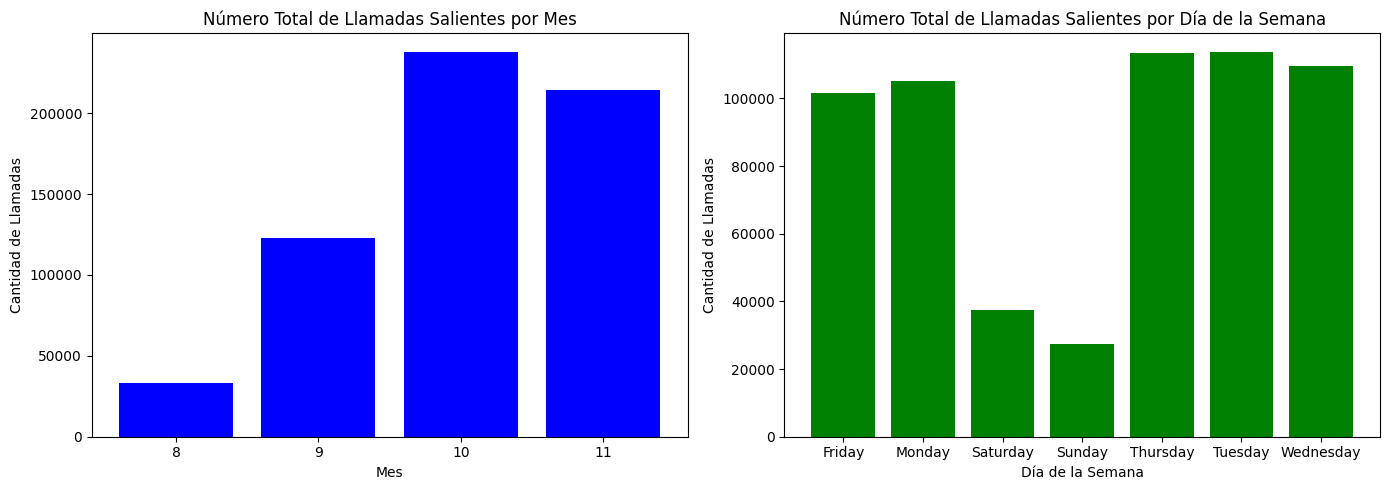

In [54]:
# Crear las gráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Número total de llamadas por mes
axes[0].bar(outgoing_calls_by_month['month'], outgoing_calls_by_month['calls_count'], color='blue')  # Color cambiado a 'purple'
axes[0].set_title('Número Total de Llamadas Salientes por Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad de Llamadas')
axes[0].set_xticks(outgoing_calls_by_month['month'])

# Gráfica 2: Número total de llamadas por día de la semana
axes[1].bar(outgoing_calls_by_weekday['weekday'], outgoing_calls_by_weekday['calls_count'], color='green')  # Color cambiado a 'green'
axes[1].set_title('Número Total de Llamadas Salientes por Día de la Semana')
axes[1].set_xlabel('Día de la Semana')
axes[1].set_ylabel('Cantidad de Llamadas')

# Ajustar diseño
plt.tight_layout()
plt.show()

Con las graficas del analisis de los meses y los dias de la semana se puede observar que:

    * Llamadas perdidas: El mes con mayor numero es Noviembre  y el dia son los Jueves, por lo que se infiere que son es el tiempo en donde los operadores son mas ineficientes, probablemente por la cantidad de trabajo que tienen.
    
    * Mayores Tiempos de espera: Octubre es el mes con mayor tiempo de espera y los sabados y los lunes son los meses en donde los clientes deben esperar mas tiempo. Esto es importante saberlo a la hora de organizar los turnos de los operadores.
    
    * Llamadas salientes: Los dias mas productivos en llamadas salientes son los Martes, miercoles y jueves y el mes es Octubre, lo cual tiene sentido ya que es el mes en donde hay mayores timepo de espera.

### Analisis de los clientes

####  Distribución de planes tarifarios

In [55]:
# Distribución de planes tarifarios

plan_counts = clients['tariff_plan'].value_counts()
plan_counts

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

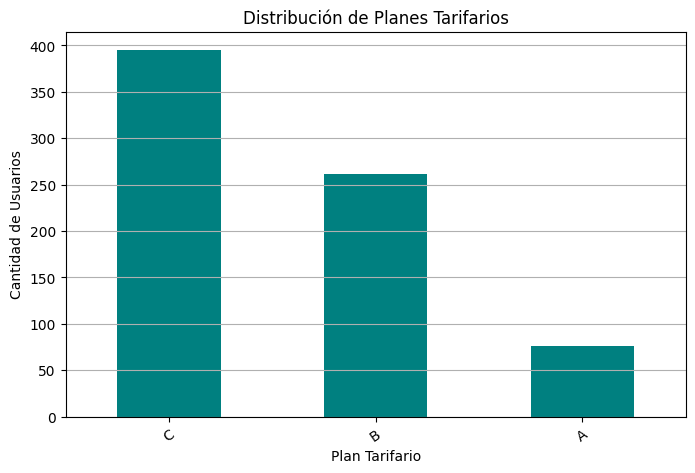

In [56]:
# Grafica de la distribución de los planes tarifarios

plt.figure(figsize=(8, 5))
plan_counts.plot(kind='bar', color='teal')
plt.title('Distribución de Planes Tarifarios')
plt.xlabel('Plan Tarifario')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

En la tabla y grafica anterior podemos observar que el plan de la tarifa que compran mas los clientes es el C, seguido del B y A. 

In [57]:
# Usuarios por mes de inicio del plan
clients['month_start'] = clients['date_start'].dt.month
users_by_month = clients['month_start'].value_counts().sort_index()
users_by_month

8     258
9     231
10    243
Name: month_start, dtype: int64

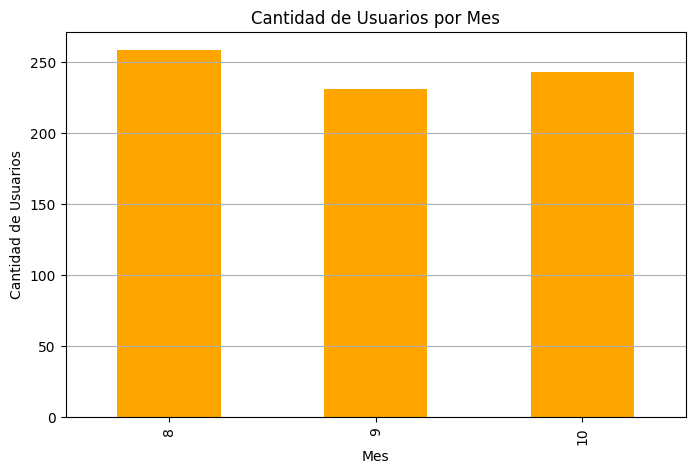

In [58]:
plt.figure(figsize=(8, 5))
users_by_month.plot(kind='bar', color='orange')
plt.title('Cantidad de Usuarios por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Usuarios')
plt.grid(axis='y')
plt.show()

Los usuarios consumieron mas durante el mes de Agosto. En este mes se atendiendoran mas clientes y no hubieron muchas perdidas de llamadas lo que pudo producir que los operadores ofrecieran un buen servicio

# Metricas en los clientes

In [59]:
# Fecha más reciente y más antigua

latest_date = clients['date_start'].max()
earliest_date = clients['date_start'].min()

print(f"Fecha más reciente: {latest_date}")
print(f"Fecha más antigua: {earliest_date}")

Fecha más reciente: 2019-10-31 00:00:00
Fecha más antigua: 2019-08-01 00:00:00


In [60]:
# Número total de usuarios por plan tarifario

total_users_by_plan = clients['tariff_plan'].value_counts()
print(total_users_by_plan)

C    395
B    261
A     76
Name: tariff_plan, dtype: int64


In [61]:
# Porcentaje de usuarios por plan tarifario

percentage_users_by_plan = clients['tariff_plan'].value_counts(normalize=True) * 100
print(percentage_users_by_plan)

C    53.961749
B    35.655738
A    10.382514
Name: tariff_plan, dtype: float64


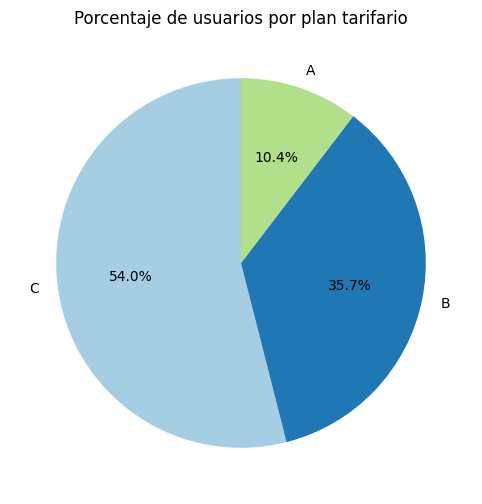

In [62]:
plt.figure(figsize=(8, 6))
percentage_users_by_plan.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Porcentaje de usuarios por plan tarifario')
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.show()

In [63]:
# Duración promedio desde el inicio del plan

clients['days_since_start'] = (pd.to_datetime('today') - clients['date_start']).dt.days

average_days = clients['days_since_start'].mean()
print(f'Duración promedio del plan (días): {average_days:.2f}')

Duración promedio del plan (días): 1933.31


In [64]:
clients

,user_id,tariff_plan,date_start,month_start,days_since_start
0,166713,A,2019-08-15,8,1964
1,166901,A,2019-08-23,8,1956
2,168527,A,2019-10-29,10,1889
3,167097,A,2019-09-01,9,1947
4,168193,A,2019-10-16,10,1902
...,...,...,...,...,...
727,166554,B,2019-08-08,8,1971
728,166911,B,2019-08-23,8,1956
729,167012,B,2019-08-28,8,1951
730,166867,B,2019-08-22,8,1957


En la métrica anterior analizamos la fecha de inicio del plan, respecto a al fecha actual y se puede observar que en promedio los usuarios han tenido sus planes activos durante aproximadamente 1930 días, lo cual equivale a unos 5 años y 3 meses. 

# Metricas de Telecon y Clientes

**Tarifa del Plan vs. Llamadas Perdidas**

Queremos analizar si existe una relación entre la tarifa del plan (tariff_plan) y la cantidad de llamadas perdidas.

In [65]:
# Unir con el dataset de clientes para obtener la tarifa
missed_calls_with_tariff = missed_calls.merge(clients[['user_id', 'tariff_plan']], on='user_id', how='left')

# Agrupar por tarifa y contar llamadas perdidas
missed_calls_by_tariff = missed_calls_with_tariff.groupby('tariff_plan')['is_missed_call'].sum().reset_index()

# Ordenar resultados 
missed_calls_by_tariff = missed_calls_by_tariff.sort_values(by='is_missed_call', ascending=False)
missed_calls_by_tariff

,tariff_plan,is_missed_call
1,B,4971
2,C,4818
0,A,4320


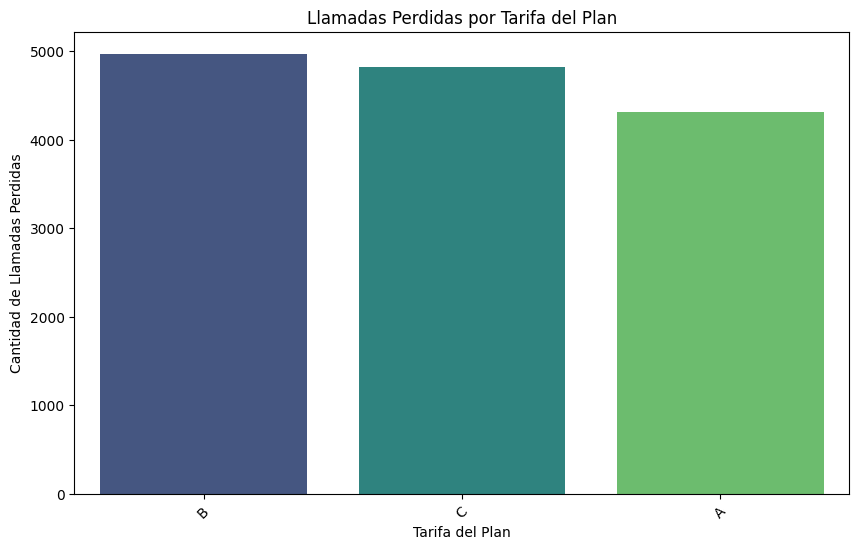

In [66]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(data=missed_calls_by_tariff, x='tariff_plan', y='is_missed_call', palette='viridis')
plt.title('Llamadas Perdidas por Tarifa del Plan')
plt.xlabel('Tarifa del Plan')
plt.ylabel('Cantidad de Llamadas Perdidas')
plt.xticks(rotation=45)
plt.show()

La grafica anterior se puede observar que el plab B tiene el mayor número de llamadas perdidas, seguido del C y A. Teniendo en cuenta que los planes B y c son los que tienen la mayor cantidad de clientes

**Relación entre Tarifa del Plan y Duración Total de Llamadas Salientes**

Esta métrica analizará si las tarifas más altas tienen un impacto en la duración total de llamadas salientes realizadas por los clientes. Puede ayudar a entender si los clientes con tarifas más altas hacen más uso del servicio para realizar llamadas.

In [67]:
# Calcular duración total de llamadas salientes por cliente
outgoing_duration_by_user = outgoing_calls.groupby('user_id')['call_duration'].sum().reset_index()
outgoing_duration_by_user.rename(columns={'call_duration': 'total_outgoing_duration'}, inplace=True)

# Unir con los datos de clientes para obtener la tarifa
outgoing_duration_with_tariff = outgoing_duration_by_user.merge(
    clients[['user_id', 'tariff_plan']], 
    on='user_id', 
    how='left'
)

# Agrupar por tarifa y calcular la duración promedio
outgoing_duration_by_tariff = outgoing_duration_with_tariff.groupby('tariff_plan')['total_outgoing_duration'].mean().reset_index()

# Ordenar resultados para facilitar la visualización
outgoing_duration_by_tariff = outgoing_duration_by_tariff.sort_values(by='total_outgoing_duration', ascending=False)
outgoing_duration_by_tariff 


,tariff_plan,total_outgoing_duration
0,A,680958.000000
1,B,81019.804598
2,C,64752.500000


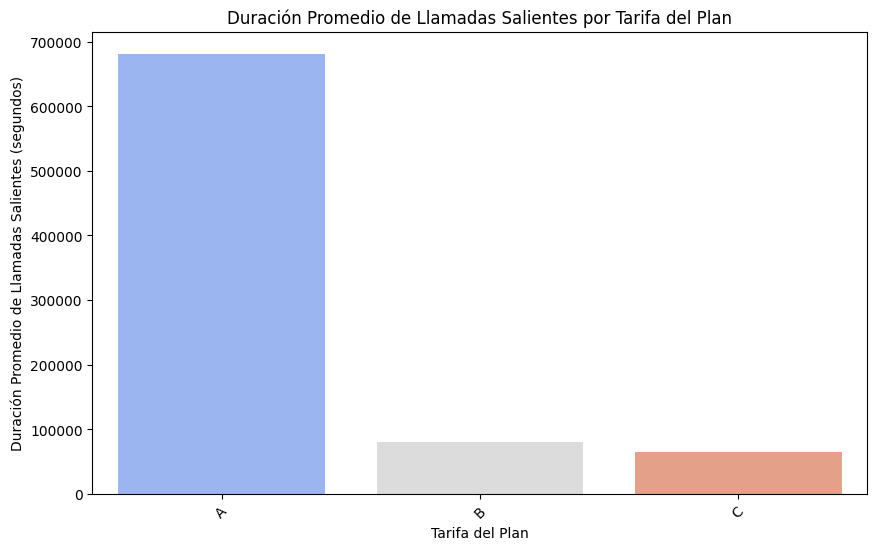

In [68]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(data=outgoing_duration_by_tariff, x='tariff_plan', y='total_outgoing_duration', palette='coolwarm')
plt.title('Duración Promedio de Llamadas Salientes por Tarifa del Plan')
plt.xlabel('Tarifa del Plan')
plt.ylabel('Duración Promedio de Llamadas Salientes (segundos)')
plt.xticks(rotation=45)
plt.show()

En la tabla y la grafica se puede observar que el Plan A tiene la duración promedio salientes más alta: Los clientes con esta tarifa realizan llamadas salientes significativamente más largas en promedio en comparación con los planes B y C. Ademas, el Plan A es el plan con menor clientes, pero es el que mas llama a la empresa, esto puede ser porque el plan A es el basico y no tiene buena covertura para los clientes

**Relación entre la tasa de llamadas perdidas y el tiempo de espera promedio**

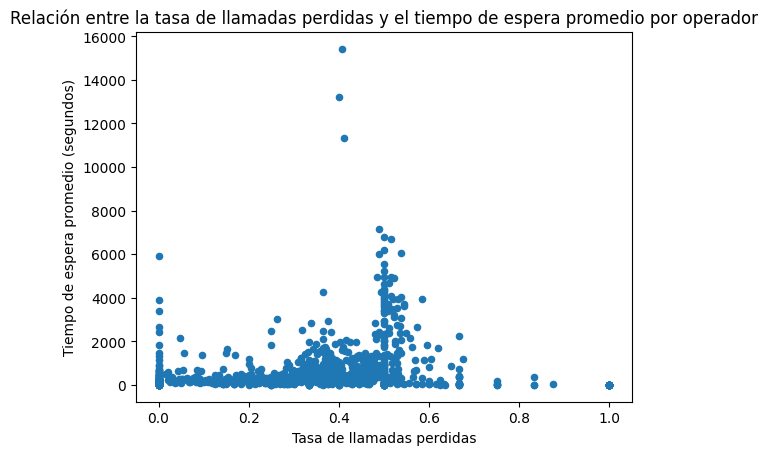

In [69]:
# Calcular la tasa de llamadas perdidas y el tiempo de espera promedio por operador
inefficient_operators = telecom.groupby('operator_id').agg({'is_missed_call': 'mean', 'call_duration': 'mean'})

# Graficar la relación entre la tasa de llamadas perdidas y el tiempo de espera promedio
inefficient_operators.plot(kind='scatter', x='is_missed_call', y='call_duration', xlabel='Tasa de llamadas perdidas', ylabel='Tiempo de espera promedio (segundos)', title='Relación entre la tasa de llamadas perdidas y el tiempo de espera promedio por operador')
plt.show()

Este grafico significa que los operadores que son ineficientes son los que tienen altas tasas de llamadas perdidas y altos tiempos de espera. Lo que impacta negativamente la experiencia de los clientes

## Prueba de Hipotesis

**Hipotesis 1**: Diferencia significativa en la duración promedio de llamadas salientes entre los Planes A y B

H0 = No hay diferencias significativas en la duración promedio de llamadas salientes entre los Planes A y B.")

H1 = Hay diferencias significativas en la duración promedio de llamadas salientes entre los Planes A y B.")

In [70]:
# Combinar los datasets (supongo que la clave común es 'user_id')
merged_data = telecom.merge(clients, on='user_id')

# Filtrar llamadas salientes
outgoing_calls = merged_data[merged_data['direction'] == 'out']

# Extraer duraciones de llamadas para Plan A y Plan B
durations_plan_a = outgoing_calls[outgoing_calls['tariff_plan'] == 'A']['call_duration']
durations_plan_b = outgoing_calls[outgoing_calls['tariff_plan'] == 'B']['call_duration']

# Realizar la prueba T
t_stat, p_value = ttest_ind(durations_plan_a, durations_plan_b, equal_var=False)

# Mostrar resultados
print(f"T-Estadístico: {t_stat:.2f}")
print(f"P-Valor: {p_value:.5f}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración promedio de llamadas salientes entre los Planes A y B.")
else:
    print("No se rechaza la hipótesis nula: No hay diferencias significativas en la duración promedio de llamadas salientes entre los Planes A y B.")

T-Estadístico: 15.82
P-Valor: 0.00000
Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración promedio de llamadas salientes entre los Planes A y B.


**Conclusion de la Hipotesis** Esto significa que si hay evidencia estadísticamente significativa para afirmar que existe una diferencia en la duración promedio de las llamadas entre los dos planes.

**Hipótesis 2: tasa de llamadas perdidas y los tiempos de espera**

Se puede analizar si existe una diferencia significativa en los tiempos promedio de espera entre los operadores con alta tasa de llamadas perdidas y los operadores con baja tasa de llamadas perdidas

H0 = No hay diferencias significativas en los tiempos de espera entre operadores con alta y baja tasa de llamadas perdidas.")

h1 = Hay diferencias significativas en los tiempos de espera entre operadores con alta y baja tasa de llamadas perdidas.")

In [71]:
# Calcular la tasa de llamadas perdidas por operador
operator_stats = telecom.groupby('operator_id').agg(
    total_calls=('is_missed_call', 'count'),
    missed_calls=('is_missed_call', 'sum'),
    avg_wait_time=('wait_time', 'mean')
).reset_index()

operator_stats['missed_call_rate'] = operator_stats['missed_calls'] / operator_stats['total_calls']

In [72]:
operator_stats

,operator_id,total_calls,missed_calls,avg_wait_time,missed_call_rate
0,879896,117,47,104.914530,0.401709
1,879898,226,89,459.690265,0.393805
2,880020,20,6,14.000000,0.300000
3,880022,70,29,53.971429,0.414286
4,880026,182,87,121.978022,0.478022
...,...,...,...,...,...
1087,972410,4,2,374.500000,0.500000
1088,972412,5,2,210.000000,0.400000
1089,972460,7,3,88.571429,0.428571
1090,973120,2,1,10.000000,0.500000


In [73]:
# Calcular el promedio de la tasa de llamadas perdidas
avg_missed_call_rate = operator_stats['missed_call_rate'].mean()
avg_missed_call_rate

0.31570480289154806

In [74]:
# Clasificar operadores en alta y baja tasa de llamadas perdidas
high_missed_rate = operator_stats[operator_stats['missed_call_rate'] > avg_missed_call_rate]
low_missed_rate = operator_stats[operator_stats['missed_call_rate'] <= avg_missed_call_rate]

# Extraer los tiempos de espera promedio
wait_times_high = high_missed_rate['avg_wait_time'].dropna()
wait_times_low = low_missed_rate['avg_wait_time'].dropna()

# Realizar la prueba t
t_stat, p_value = ttest_ind(wait_times_high, wait_times_low, equal_var=False)

# Resultados
print(f"T-Estadístico: {t_stat:.2f}")
print(f"P-Valor: {p_value:.5f}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los tiempos de espera entre operadores con alta y baja tasa de llamadas perdidas.")
else:
    print("No se rechaza la hipótesis nula: No hay diferencias significativas en los tiempos de espera entre operadores con alta y baja tasa de llamadas perdidas.")

T-Estadístico: 11.48
P-Valor: 0.00000
Rechazamos la hipótesis nula: Hay una diferencia significativa en los tiempos de espera entre operadores con alta y baja tasa de llamadas perdidas.


**Conclusiones de la Hipotesis** Este resultado indica que encontramos evidencia estadística sólida de que **si** existe una diferencia significativa en los tiempos de espera entre los operadores con alta y baja tasa de llamadas perdidas. Esto sugiere que el tiempo de espera es un factor importante y está asociado con el desempeño de los operadores. En resumen: Los operadores con una alta tasa de llamadas perdidas tienden a tener tiempos de espera significativamente más largos que aquellos con una baja tasa de llamadas perdidas.

**Hipotesis 3**: diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas

H0 = No existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.

H1 = Existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.

In [75]:
# Agrupar por tarifa y calcular tasa de llamadas perdidas
tariff_missed_calls = merged_data.groupby('tariff_plan')['is_missed_call'].mean()

# Dividir tarifas en altas y bajas
high_tariff = merged_data[merged_data['tariff_plan'].isin(tariff_missed_calls[tariff_missed_calls <= tariff_missed_calls.median()].index)]
low_tariff = merged_data[merged_data['tariff_plan'].isin(tariff_missed_calls[tariff_missed_calls > tariff_missed_calls.median()].index)]

# Comparar tasas de llamadas perdidas entre los dos grupos

#Tarifas altas: Planes con una tasa de llamadas perdidas igual o menor que la mediana.
#Tarifas bajas: Planes con una tasa de llamadas perdidas mayor que la mediana.
    
high_tariff_missed = high_tariff['is_missed_call']
low_tariff_missed = low_tariff['is_missed_call']

# Prueba t para comparar medias
t_stat_tariff, p_value_tariff = stats.ttest_ind(high_tariff_missed, low_tariff_missed, equal_var=False)
print("\nHipótesis B: Impacto de la Tarifa del Cliente")
print(f"T-statistic: {t_stat_tariff}, P-value: {p_value_tariff}")
if p_value_tariff < 0.05:
    print("Rechazamos H0: Existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.")
else:
    print("No rechazamos H0: No existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.")


Hipótesis B: Impacto de la Tarifa del Cliente
T-statistic: -3.7764525822079675, P-value: 0.0001594853513312175
Rechazamos H0: Existe una diferencia significativa en las tasas de llamadas perdidas entre clientes con tarifas altas y bajas.


**Conclusion** Los clientes con tarifas más altas tienen menores tasas de llamadas perdidas en comparación con los clientes con tarifas más bajas. Esto significa que los clientes que pagan mas tienen mejor servicio en la atención y menores tasas de llamadas perdidas.

## Dashboards


Hacer clic para ver el Dashboard creado en Tableau: 

https://public.tableau.com/views/Telecomunicacionesproyectofinal/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

##  Presentaciòn corporativa

https://drive.google.com/file/d/14-BR-puh3ix5ovNPh9ZqMQCHE4Nn5DNg/view?usp=sharing

## Conclusiones y recomendaciones

**Conclusiones:**

Se puede concluir con el analisis que durante los meses de agosto y noviembre del año 2019. Hay operadores que tienen un muy buen rendimiento de llamadas recibidas, sin embargo se identificó que los operadores con altas tasas de llamadas perdidas y altos tiempos de espera son operadores ineficientes y que impactan negativamente la experiencia de los clientes. Por otro lado es mucho mayor la cantidad de llamadas perdidas internas que las entrantes, lo que indica que cuando los operadores intentan traspasar una llamada para que el cliente sea atendido por otro operador no es eficiente y esto tambien impacta al cliente final. Ademas, se observó que los clientes que pagan una tarifa más alta son los clientes que tienen menores tasas de llamadas perdidas, lo cual es de esperar en este tipo de negocios, en donde los planes que se adquieren cuentan con una serie de especificaciones en el servicio prestado. Por lo anterior, se analiza que si hay una diferencia significativa en la duración promedio de llamadas salientes entre los Planes A y B. 


**Recomendaciones:**
* Se recomienda capacitar adecuadamente a los operadores ya que se evidencio que los clientes pueden durar por lo menos 1 hora esperando en ser atendidos. Esto no deberia pasar ya que se puede perder al cliente y por ende un cliente insatisfecho nos generaria un voz a voz inadecuado.
* Los planes en donde los clientes tienen una tarifa baja es necesario mejorar la respuesta y el servicio al cliente. Se podria crear una estrategia para incentivar la compra de planes con tarifas mas altas pero con buen servicio de respuesta.
* Es necesario reorganizar los horarios de los operadores ya que los fines de semana se evidencia altas tasas de llamadas perdidas, tal vez por que no hay suficientes operadores para la demanda. Si se organiza los horarios y se reparten las tareas adecuadamente la operacion podria ser mas eficiente.
* Implementar programas o software para que cuando algunos operadores no cuenten con llamadas entrantes, pues pueda colaborar a los operadores que realizan llamadas salientes.
* Se puede ofrecer incentivos a los clientes que cuentan con mayor antiguedad con los planes, puede ser descuentos o planes de fidelizacion. 
* Se puede premiar a los operadores que tengan mejores resultados en las metricas. Puede ser no solamente con más dinero, sino ademas con opciones de escoger el horario de trabajo, salidas temprano, trabajar en casa. Todo esto los motivara a ser mejores.
* Determinar el tipo de llamada y el problema, ya que hay clientes que tienen diferentes tipos de problemas y por ende la duración de la llamada y la respuesta al cliente va a ser alta. Con esto propongo que se podria dividir el equipo de operadores por tipo de problema o solucion para los clientes. 

## Bibliografia

Analítica de datos: Tipos de dashboards y ejemplos de KPIs : https://edicom.co/blog/tipos-dashboards-ejemplos-kpis

KPIs para experiencia del cliente: https://clickup.com/blog/customer-experience-kpis/?utm_source=google-pmax&utm_medium=cpc&utm_campaign=gpm_cpc_ar_nnc_pro_trial_all-devices_tcpa_lp_x_all-departments_x_pmax&utm_content=&utm_creative=_____&gad_source=1&gclid=CjwKCAiApsm7BhBZEiwAvIu2X7uWZFoPOU0xoZNV_TQKPPe1U916343Ee7Bks4rbK_RtoXjcDwKu-RoCs40QAvD_BwE

Mejora de eficiencia en la operacion de las empresas Telecomunicaciones: https://esunique.com/consejos-utiles-para-mejorar-la-eficiencia-de-tu-compania/

Telefonia: https://www.phonex.com.mx/blog/estrategias-para-maximizar-la-productividad-de-los-agentes-telefonicos-en-un-centro-de-contacto